In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Red Wine Quality Project
Problem Statement:
Simple and clean practice dataset for regression or classification modelling

Context

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality  ..

 

Content

For more information

Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol



Output variable (based on sensory data):
   12 - quality (score between 0 and 10) 

### Importing the DataSet

In [6]:
data =pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
data.shape

(1599, 12)

In [11]:
## From observing the dataset we see that, Quality is the dependent variable or label
## There is 1599 rows and 12 columns

###  Exploratory Data Analysis(EDA)

In [13]:
#Checking the details of dataset

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
#No null values that we see
#All datatyoes are in float and integet, so no requirement of feature engineering here

In [23]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


###### Visualizing the DataSet for a better analysis

In [16]:
#Checking the disctribution of the data and skewness
#Plotting heatmap to see the corelation between features

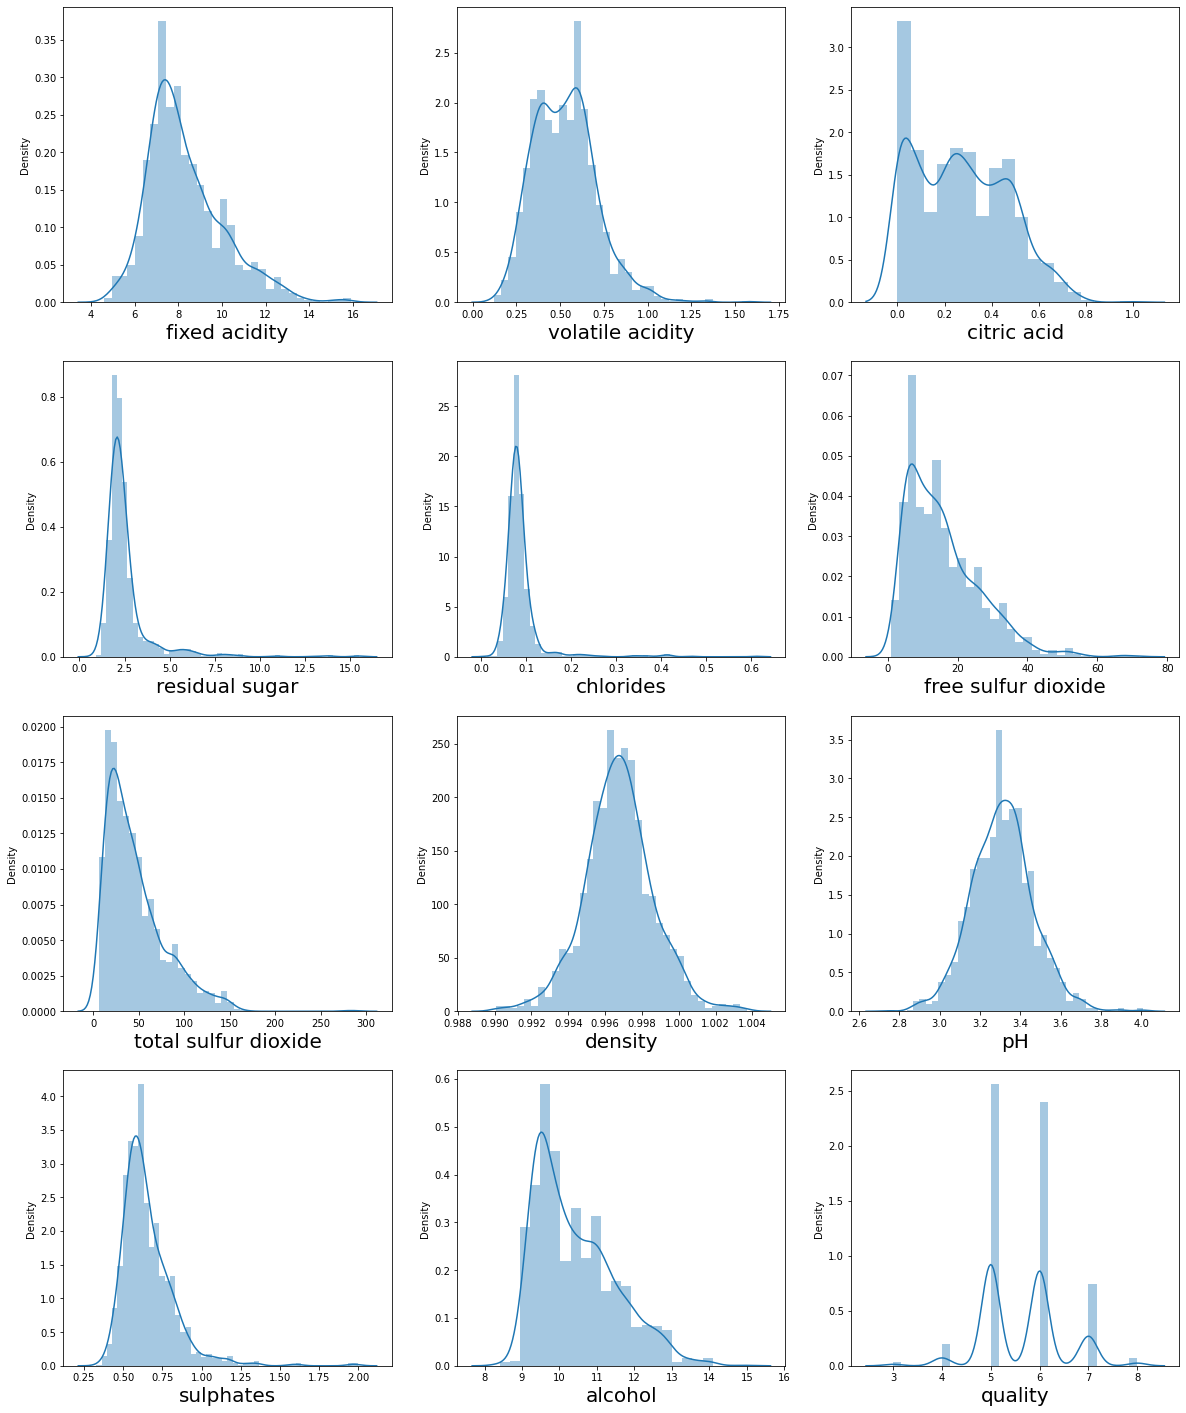

In [17]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [18]:
#fixed acidity looks normally distributed
#volatile acidity looks normally distributed
#will check the other relations of the citric acid
#residual sugar is skewed right, will look for the outliers
#Chloride looks skewed right, will look for the outliers
#free sulphur dioxide looks normally distributed
#total sulfur dioxide looks normally distributed
#density looks normally distributed
#ph looks normally distributed
#sulphates looks normally distributed
#alcohol looks normally distributed

In [21]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

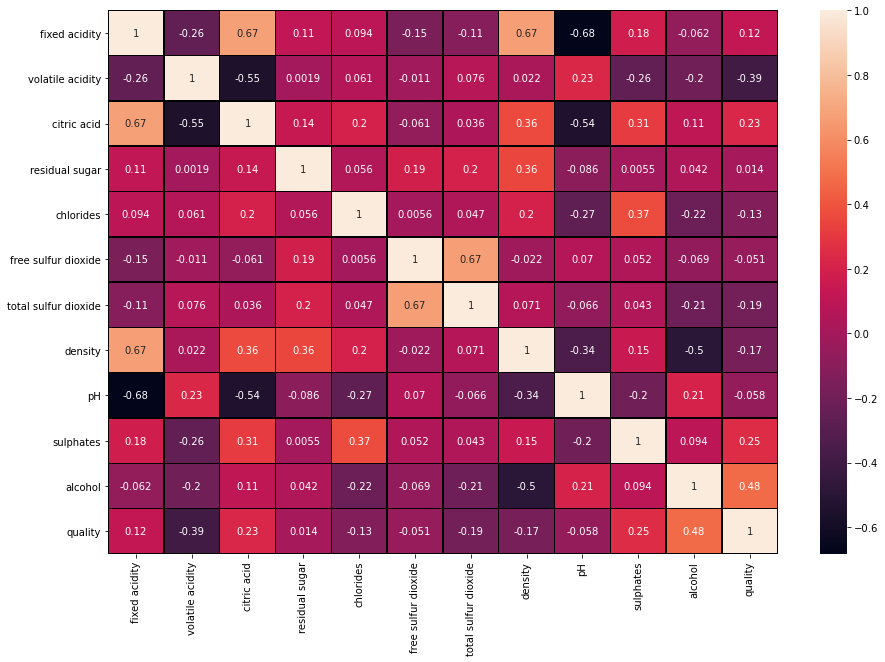

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True, linewidths=0.5, linecolor='black')

In [24]:
#Observing the corelation between all the features and the features and label, will not consider removing any feature

### Preprocessing Data 

In [25]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

##### Classifying the wine quality into good or bad based on the quality

In [26]:
#Classifying the wine quality into good or bad based on the quality
#'Bad' quality if the quality of wine is less than 7
#'Good' quality if the quality of wine is =>7

In [27]:
data['quality']=data['quality'].apply(lambda x:1 if x > 6.5 else 0)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

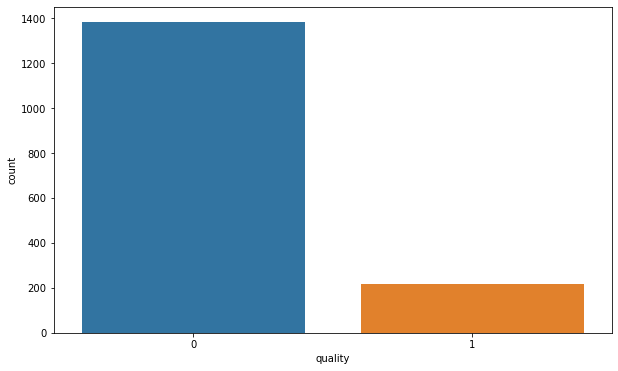

In [28]:
print(data['quality'].value_counts())

fig=plt.figure(figsize=(10,6))
sns.countplot(data['quality'])

In [29]:
# data distribution of 0 is much higher then 1

###### Splitting Features and Label

In [30]:
x = data.drop(columns = ['quality'])
y = data ['quality']

In [32]:
print(x_train.shape) #Checking the data distribution
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


###### Seperating the dataset into train and test

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state =42)

###### Applying standard scalling to the dataset

In [33]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled.shape[1]

11

# Model Building

## Decission Tree Model Building

In [39]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
feature_name=list(x.columns)
class_name=list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [41]:
clf.score(x_train,y_train) # This is training score

1.0

In [45]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.871875

## Hyper Parameter Tuning

In [46]:
grid_param = {
    'criterion':['gini', 'entropy'],
    'max_depth': range(10,15),       #The max depth of the tree
    'min_samples_leaf':range(2,20),   #
    'min_samples_split':range(3,10)
}

In [47]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

In [48]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'min_samples_leaf': range(2, 20),
                         'min_samples_split': range(3, 10)})

In [50]:
best_parameter = grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 4}


In [52]:
clf = DecisionTreeClassifier(criterion = 'gini',min_samples_split = 4, max_depth=10, min_samples_leaf=18)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=18, min_samples_split=4)

In [53]:
y_pred = clf.predict(x_test)

In [54]:
accuracy_score(y_test,y_pred)

0.878125

###### Note: The accuracy score has slighty increased from 0.8718 to 0.8781 after tuning

## RandomForest Model Building

In [57]:
rf = RandomForestClassifier(n_estimators =100) #initializing RandomForestClassifier
rf.fit(x_train,y_train) #Training the model

y_pred=rf.predict(x_test) #predicting for the test data

In [58]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[264   9]
 [ 22  25]]


In [59]:
print('Total Predictions:', len(y_pred))
print('Correct Predictions:',sum(y_pred==y_test))
print('Incorrect Predictions:',sum(y_pred !=y_test))
print('Accuracy:',sum(y_pred==y_test)*100/len(y_pred), "%")

Total Predictions: 320
Correct Predictions: 289
Incorrect Predictions: 31
Accuracy: 90.3125 %


In [60]:
## Using the hyper parameter tuning parameters will apply to RandomForsetClassifier and try to get the score

In [61]:
rf = RandomForestClassifier(criterion = 'gini',min_samples_split = 4, max_depth=10, min_samples_leaf=18)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=18, min_samples_split=4)

In [66]:
y_pred_1 = rf.predict(x_test)

In [67]:
accuracy_score(y_test,y_pred_1)

0.865625

## Result

In [74]:
red_wine ={'Model':['Decission Tree','Decission Tree with Hyper Tuning','Random Forest','Random Forest with Hyper Tuning'],
                         'Scores':[87.18 ,87.81, 90.31, 86.56]}

In [79]:
df=pd.DataFrame(data=red_wine)

In [82]:
df

,Model,Scores
0,Decission Tree,87.18
1,Decission Tree with Hyper Tuning,87.81
2,Random Forest,90.31
3,Random Forest with Hyper Tuning,86.56


In [83]:
### Notes: The best model accuracy score is RandomForest

In [84]:
#Saving the bes model
import pickle

In [86]:
filename='Red_Wine_Quality'
pickle.dump(rf,open(filename, 'wb'))